copied from Mr. Kaviani

for prqactice

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

<AxesSubplot: xlabel='target', ylabel='count'>

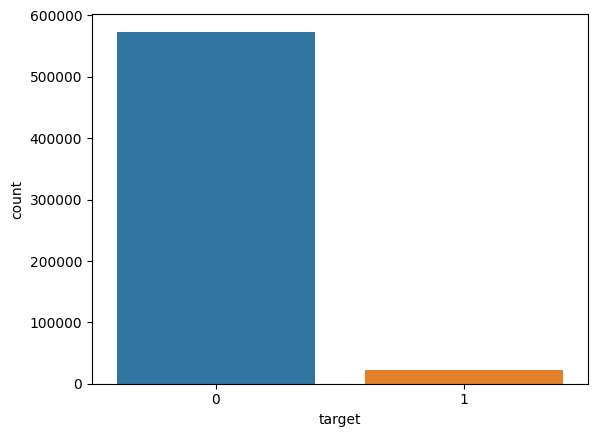

In [5]:
sns.countplot(data=data, x='target')

In [6]:
data.groupby('target')['id'].count() / len(data)

target
0    0.963552
1    0.036448
Name: id, dtype: float64

In [7]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X = data.iloc[:, 2:]
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [9]:
y = data['target']

In [10]:
cat_col = [i for i in range(0, len(X.columns)) if 'cat' in X.columns[i]]

In [11]:
cat_col

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [12]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y)

In [13]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10)

In [14]:
model.fit(X_train, y_train, cat_col, eval_set=(X_eval, y_eval))

/home/masoud533/anaconda3/lib/python3.8/site-packages/catboost/core.py:966: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)


0:	learn: 0.9636365	test: 0.9633139	best: 0.9633139 (0)	total: 208ms	remaining: 20.6s
10:	learn: 0.9636342	test: 0.9633072	best: 0.9633139 (0)	total: 1.23s	remaining: 9.99s
20:	learn: 0.9636342	test: 0.9633072	best: 0.9633139 (0)	total: 2.23s	remaining: 8.38s
30:	learn: 0.9636342	test: 0.9633072	best: 0.9633139 (0)	total: 3.27s	remaining: 7.28s
40:	learn: 0.9636410	test: 0.9633072	best: 0.9633139 (0)	total: 4.22s	remaining: 6.08s
50:	learn: 0.9636477	test: 0.9633005	best: 0.9633139 (0)	total: 5.13s	remaining: 4.93s
60:	learn: 0.9636611	test: 0.9633072	best: 0.9633139 (0)	total: 6.06s	remaining: 3.88s
70:	learn: 0.9636611	test: 0.9633072	best: 0.9633139 (0)	total: 7s	remaining: 2.86s
80:	learn: 0.9636678	test: 0.9633072	best: 0.9633139 (0)	total: 7.85s	remaining: 1.84s
90:	learn: 0.9636746	test: 0.9633072	best: 0.9633139 (0)	total: 8.85s	remaining: 875ms
99:	learn: 0.9636723	test: 0.9633072	best: 0.9633139 (0)	total: 9.65s	remaining: 0us

bestTest = 0.9633139117
bestIteration = 0

Shrin

In [15]:
y_pred = model.predict(X_eval)

In [16]:
cm = confusion_matrix(y_true=y_eval, y_pred=y_pred)
cm

array([[143343,      0],
       [  5459,      1]])

In [18]:
print(classification_report(y_true=y_eval, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143343
           1       1.00      0.00      0.00      5460

    accuracy                           0.96    148803
   macro avg       0.98      0.50      0.49    148803
weighted avg       0.96      0.96      0.95    148803



In [19]:
rus = RandomUnderSampler()

In [20]:
X_rus, y_rus = rus.fit_resample(X, y)

In [21]:
np.shape(X_rus)

(43388, 57)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)

In [47]:
model = CatBoostClassifier(iterations=1200, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10)

In [48]:
model.fit(X_train, y_train, cat_col, eval_set=(X_eval, y_eval))

/home/masoud533/anaconda3/lib/python3.8/site-packages/catboost/core.py:966: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)


0:	learn: 0.5759811	test: 0.5790676	best: 0.5790676 (0)	total: 56.7ms	remaining: 1m 8s
10:	learn: 0.5926677	test: 0.6069434	best: 0.6275142 (1)	total: 531ms	remaining: 57.4s
20:	learn: 0.5972466	test: 0.6047392	best: 0.6275142 (1)	total: 979ms	remaining: 55s
30:	learn: 0.6017947	test: 0.6055389	best: 0.6275142 (1)	total: 1.44s	remaining: 54.3s
40:	learn: 0.6052057	test: 0.6048064	best: 0.6275142 (1)	total: 1.89s	remaining: 53.5s
50:	learn: 0.6094773	test: 0.6073601	best: 0.6275142 (1)	total: 2.36s	remaining: 53.2s
60:	learn: 0.6118128	test: 0.6084891	best: 0.6275142 (1)	total: 2.79s	remaining: 52.1s
70:	learn: 0.6146707	test: 0.6080254	best: 0.6275142 (1)	total: 3.25s	remaining: 51.7s
80:	learn: 0.6168833	test: 0.6077969	best: 0.6275142 (1)	total: 3.7s	remaining: 51.2s
90:	learn: 0.6185735	test: 0.6084084	best: 0.6275142 (1)	total: 4.11s	remaining: 50.1s
100:	learn: 0.6209090	test: 0.6067216	best: 0.6275142 (1)	total: 4.57s	remaining: 49.7s
110:	learn: 0.6236440	test: 0.6072391	best: 0

940:	learn: 0.7828893	test: 0.6164123	best: 0.6275142 (1)	total: 44.3s	remaining: 12.2s
950:	learn: 0.7837497	test: 0.6167618	best: 0.6275142 (1)	total: 44.7s	remaining: 11.7s
960:	learn: 0.7846409	test: 0.6168626	best: 0.6275142 (1)	total: 45.2s	remaining: 11.2s
970:	learn: 0.7855014	test: 0.6165467	best: 0.6275142 (1)	total: 45.7s	remaining: 10.8s
980:	learn: 0.7871301	test: 0.6166475	best: 0.6275142 (1)	total: 46.2s	remaining: 10.3s
990:	learn: 0.7889432	test: 0.6162443	best: 0.6275142 (1)	total: 46.6s	remaining: 9.83s
1000:	learn: 0.7899880	test: 0.6164257	best: 0.6275142 (1)	total: 47.1s	remaining: 9.36s
1010:	learn: 0.7915860	test: 0.6161637	best: 0.6275142 (1)	total: 47.6s	remaining: 8.89s
1020:	learn: 0.7926923	test: 0.6160964	best: 0.6275142 (1)	total: 48s	remaining: 8.42s
1030:	learn: 0.7937986	test: 0.6154647	best: 0.6275142 (1)	total: 48.5s	remaining: 7.95s
1040:	learn: 0.7946283	test: 0.6150078	best: 0.6275142 (1)	total: 49s	remaining: 7.48s
1050:	learn: 0.7961956	test: 0.

In [49]:
y_pred = model.predict(X_eval)

In [50]:
print(classification_report(y_true=y_eval, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      0.63      0.77    143343
           1       0.05      0.53      0.09      5460

    accuracy                           0.63    148803
   macro avg       0.51      0.58      0.43    148803
weighted avg       0.94      0.63      0.74    148803



In [53]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros)

In [55]:
model = CatBoostClassifier(iterations=1200, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10)

In [56]:
model.fit(X_train, y_train, cat_col, eval_set=(X_eval, y_eval))

/home/masoud533/anaconda3/lib/python3.8/site-packages/catboost/core.py:966: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)


0:	learn: 0.5790786	test: 0.5803579	best: 0.5803579 (0)	total: 697ms	remaining: 13m 55s
10:	learn: 0.6030534	test: 0.6282803	best: 0.6282803 (10)	total: 6.32s	remaining: 11m 23s
20:	learn: 0.6200352	test: 0.6425677	best: 0.6425677 (20)	total: 11.8s	remaining: 11m 3s
30:	learn: 0.6525700	test: 0.6707459	best: 0.6707996 (29)	total: 16.9s	remaining: 10m 39s
40:	learn: 0.6672572	test: 0.6775132	best: 0.6776342 (39)	total: 21.4s	remaining: 10m 5s
50:	learn: 0.6740806	test: 0.6866663	best: 0.6866663 (50)	total: 26.4s	remaining: 9m 55s
60:	learn: 0.6785129	test: 0.6891528	best: 0.6891528 (60)	total: 31.4s	remaining: 9m 47s
70:	learn: 0.6866381	test: 0.6974658	best: 0.6974658 (70)	total: 36.3s	remaining: 9m 36s
80:	learn: 0.6929582	test: 0.7003891	best: 0.7003891 (80)	total: 41s	remaining: 9m 26s
90:	learn: 0.6988133	test: 0.7002009	best: 0.7006781 (89)	total: 46.2s	remaining: 9m 22s
100:	learn: 0.7031886	test: 0.7042331	best: 0.7044818 (98)	total: 51.1s	remaining: 9m 16s
110:	learn: 0.7075395

900:	learn: 0.8541714	test: 0.8549357	best: 0.8549492 (899)	total: 7m 24s	remaining: 2m 27s
910:	learn: 0.8547421	test: 0.8557086	best: 0.8557086 (910)	total: 7m 28s	remaining: 2m 22s
920:	learn: 0.8571216	test: 0.8583564	best: 0.8583564 (920)	total: 7m 34s	remaining: 2m 17s
930:	learn: 0.8580980	test: 0.8592636	best: 0.8592636 (930)	total: 7m 39s	remaining: 2m 12s
940:	learn: 0.8591244	test: 0.8602649	best: 0.8602649 (940)	total: 7m 43s	remaining: 2m 7s
950:	learn: 0.8597312	test: 0.8613670	best: 0.8613670 (950)	total: 7m 48s	remaining: 2m 2s
960:	learn: 0.8604054	test: 0.8623146	best: 0.8623616 (959)	total: 7m 54s	remaining: 1m 57s
970:	learn: 0.8607414	test: 0.8629194	best: 0.8629194 (970)	total: 7m 58s	remaining: 1m 52s
980:	learn: 0.8618689	test: 0.8639678	best: 0.8640350 (977)	total: 8m 3s	remaining: 1m 47s
990:	learn: 0.8621130	test: 0.8640888	best: 0.8641492 (988)	total: 8m 8s	remaining: 1m 43s
1000:	learn: 0.8629267	test: 0.8649355	best: 0.8649355 (1000)	total: 8m 13s	remainin

In [57]:
y_pred = model.predict(X_eval)

In [58]:
print(classification_report(y_true=y_eval, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    143343
           1       0.22      0.91      0.36      5460

    accuracy                           0.88    148803
   macro avg       0.61      0.89      0.65    148803
weighted avg       0.97      0.88      0.91    148803

